In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import time
import math
from scipy import signal
%matplotlib inline

In [68]:
def contrast_normalise(img):   
    img_yuv = cv2.cvtColor(img, cv2.COLOR_BGR2YUV)
    img_yuv[:,:,0] = cv2.equalizeHist(img_yuv[:,:,0])
    return cv2.cvtColor(img_yuv, cv2.COLOR_YUV2BGR)

In [3]:
def get_wa(img, dst, x1, y1, x2, y2):
    try:
        if dst[x1][y1] == 0 or dst[x2][y2] == 0 :
            return 0, 0
    except:
        return 0, 0
#     print(x1, y1)
    patch1 = contrast_normalise(img[x1-2:x1+3, y1-2:y1+3]) #padding?
    patch2 = contrast_normalise(img[x2-2:x2+3, y2-2:y2+3]) #padding?
    corr = np.zeros((5, 5))
    include = 1
    for i in range(3):
        corr = signal.correlate2d(patch1[..., i], patch2[..., i], boundary='symm', mode='same')
        if corr[2][2] < 100: #thresholding for color images?
            return 0, 0
    
    w = (np.exp(np.linalg.norm(patch1 - patch2)/(-2*0.2*0.2)))  #giving 0
    var1 = np.var(patch1)
    var2 = np.var(patch2)
    if var1 > var2:
        return w, np.sqrt(var2/var1)
    else:
        return w, np.sqrt(var1/var2)
    
def get_ck(img, crnrs, dk):
    plt.imshow(img)
    plt.show()
    numer = 0
    denom = 0
    for x in range(img.shape[0]):
        for y in range(img.shape[1]):
            w, a = get_wa(img, crnrs, x, y, x+dk[0], y+dk[1])
            if w!=0 or a!=0:
                print(w, a)
            numer += w*a
            denom += w
            
    return numer/denom

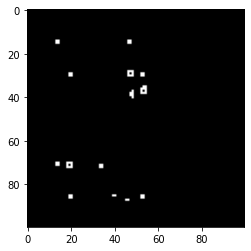

NameError: name 'get_ck' is not defined

In [2]:
def calling():
    filename = 'test_im.png'
    img = cv2.imread(filename)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) #channel by channel?

    gray = np.float32(gray)
    dst = cv2.cornerHarris(gray,2,3,0.04)

    threshold = 0.01*dst.max()
    crnrs = np.zeros((dst.shape))
    crnrs[dst>threshold] = 255
    plt.imshow(crnrs, cmap="gray")
    plt.show()
    
    print(get_ck(img, dst, [10, 20]))
    
    img[dst>threshold]=[0, 0, 255]
    plt.imshow(img)
    plt.show()
    
    
    
calling()